<a href="https://colab.research.google.com/github/estheralwaysbesterpritsker/congapp__EpiModel/blob/main/_NEWEST_EpiModel_PritskerE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

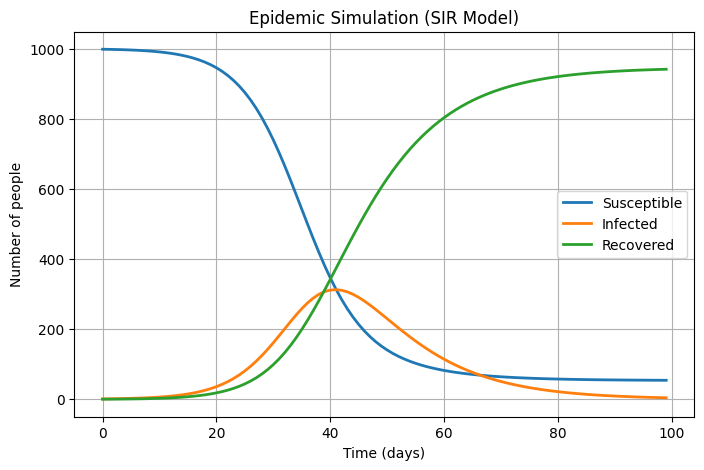

In [ ]:
# EpiModel: SIR epidemic simulation (discrete form)

# Parameters
beta = 0.3      # Infection rate (β)
gamma = 0.1     # Recovery rate (γ)
N = 1000        # Total population
I0 = 1          # Initial infected
R0 = 0          # Initial recovered
S0 = N - I0 - R0
time_steps = 100

# Lists to store results
S, I, R = [S0], [I0], [R0]

# Simulation loop
for t in range(1, time_steps):
    new_infected = beta * S[-1] * I[-1] / N
    new_recovered = gamma * I[-1]

    S_next = S[-1] - new_infected
    I_next = I[-1] + new_infected - new_recovered
    R_next = R[-1] + new_recovered

    S.append(S_next)
    I.append(I_next)
    R.append(R_next)

# Convert to numpy arrays (optional)
S, I, R = np.array(S), np.array(I), np.array(R)

# Plot
plt.figure(figsize=(8,5))
plt.plot(S, label='Susceptible', linewidth=2)
plt.plot(I, label='Infected', linewidth=2)
plt.plot(R, label='Recovered', linewidth=2)
plt.title('Epidemic Simulation (SIR Model)')
plt.xlabel('Time (days)')
plt.ylabel('Number of people')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact

@interact(beta=(0.0,1.0,0.05), gamma=(0.0,1.0,0.05), N=(100,10000,100))
def simulate(beta=0.3, gamma=0.1, N=1000):
    I0, R0, S0, time_steps = 1, 0, N-1, 100
    S, I, R = [S0], [I0], [R0]
    for t in range(1, time_steps):
        new_infected = beta * S[-1] * I[-1] / N
        new_recovered = gamma * I[-1]
        S_next = S[-1] - new_infected
        I_next = I[-1] + new_infected - new_recovered
        R_next = R[-1] + new_recovered
        S.append(S_next); I.append(I_next); R.append(R_next)
    plt.figure(figsize=(8,5))
    plt.plot(S, label='Susceptible'); plt.plot(I, label='Infected'); plt.plot(R, label='Recovered')
    plt.xlabel('Time'); plt.ylabel('People'); plt.legend(); plt.grid(True)
    plt.show()

interactive(children=(FloatSlider(value=0.3, description='beta', max=1.0, step=0.05), FloatSlider(value=0.1, d…

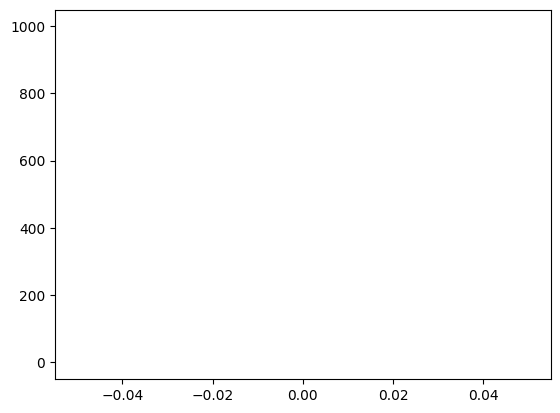

In [ ]:
beta = 0.3     # infection rate
gamma = 0.1    # recovery rate
N = 1000       # total population
I0 = 1         # initial infected

S0 = N - I0 - R0
S, I, R = [S0], [I0], [R0]

for t in range(1, time_steps):
    new_infected = beta * S[-1] * I[-1] / N
    new_recovered = gamma * I[-1]
    ...

plt.plot(S, label='Susceptible')
plt.plot(I, label='Infected')
plt.plot(R, label='Recovered')



In [ ]:
# Simple disease selector + SIR
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown

# Approximate illustrative parameters (not exact - for teaching/simulation)
# beta = infection rate per contact; gamma = recovery rate per time-step
disease_params = {
    "Dengue (mosquito)": {"beta":0.35, "gamma":0.14, "vector":True},
    "West Nile (mosquito)": {"beta":0.18, "gamma":0.10, "vector":True},
    "EEE (mosquito)": {"beta":0.2, "gamma":0.08, "vector":True},
    "Ehrlichiosis (tick/bacterial)": {"beta":0.06, "gamma":0.2, "vector":False},
    "RMSF (tick/bacterial)": {"beta":0.08, "gamma":0.22, "vector":False},
    "Generic flu-like (for comparison)": {"beta":0.3, "gamma":0.1, "vector":False},
}

def run_simple_sir(disease="Dengue (mosquito)", N=1000, I0=1, steps=120, beta=None, gamma=None):
    params = disease_params[disease]
    # allow overriding with sliders
    beta = beta if beta is not None else params["beta"]
    gamma = gamma if gamma is not None else params["gamma"]
    S0 = N - I0
    S, I, R = [S0], [I0], [0]
    for t in range(1, steps):
        new_inf = beta * S[-1] * I[-1] / N
        new_rec = gamma * I[-1]
        S.append(S[-1] - new_inf)
        I.append(I[-1] + new_inf - new_rec)
        R.append(R[-1] + new_rec)
    t = np.arange(steps)
    plt.figure(figsize=(9,5))
    plt.plot(t, S, label="Susceptible")
    plt.plot(t, I, label="Infected")
    plt.plot(t, R, label="Recovered")
    plt.title(f"SIR: {disease} (beta={beta:.3f}, gamma={gamma:.3f})")
    plt.xlabel("Time (steps)")
    plt.ylabel("People")
    plt.legend(); plt.grid(True); plt.show()

# interactive controls
@interact(
    disease=Dropdown(options=list(disease_params.keys()), value="Dengue (mosquito)"),
    N=IntSlider(min=200, max=5000, step=100, value=1000),
    I0=IntSlider(min=1, max=50, step=1, value=1),
    steps=IntSlider(min=20, max=400, step=10, value=120),
    beta=FloatSlider(min=0.0, max=1.0, step=0.01, value=None),
    gamma=FloatSlider(min=0.0, max=1.0, step=0.01, value=None)
)
def _interactive(disease, N, I0, steps, beta, gamma):
    # If user left beta/gamma at None, the function will use defaults from disease_params
    run_simple_sir(disease=disease, N=N, I0=I0, steps=steps,
                   beta=(None if beta is None else beta),
                   gamma=(None if gamma is None else gamma))

interactive(children=(Dropdown(description='disease', options=('Dengue (mosquito)', 'West Nile (mosquito)', 'E…

In [ ]:
# ❤️ Heart Disease Model Simulation

def heart_disease_model(L=900, H=100, C=0, p_increase=0.05, p_event=0.02, years=50):
    """
    Simulates heart disease progression over time.
    L = Low-risk population
    H = High-risk population
    C = Cumulative heart disease cases
    p_increase = rate of becoming high-risk
    p_event = probability of heart event per year for high-risk people
    years = number of years simulated
    """
    for year in range(years):
        new_high_risk = p_increase * L
        new_cases = p_event * H

        L = L - new_high_risk
        H = H + new_high_risk - new_cases
        C = C + new_cases

        print(f"Year {year+1}: Low={L:.0f}, High={H:.0f}, Events={C:.0f}")

# 🧠 Run the simulation
heart_disease_model()

Year 1: Low=855, High=143, Events=2
Year 2: Low=812, High=183, Events=5
Year 3: Low=772, High=220, Events=9
Year 4: Low=733, High=254, Events=13
Year 5: Low=696, High=286, Events=18
Year 6: Low=662, High=315, Events=24
Year 7: Low=629, High=341, Events=30
Year 8: Low=597, High=366, Events=37
Year 9: Low=567, High=389, Events=44
Year 10: Low=539, High=409, Events=52
Year 11: Low=512, High=428, Events=60
Year 12: Low=486, High=445, Events=69
Year 13: Low=462, High=460, Events=78
Year 14: Low=439, High=474, Events=87
Year 15: Low=417, High=487, Events=96
Year 16: Low=396, High=498, Events=106
Year 17: Low=376, High=508, Events=116
Year 18: Low=357, High=516, Events=126
Year 19: Low=340, High=524, Events=136
Year 20: Low=323, High=530, Events=147
Year 21: Low=307, High=536, Events=158
Year 22: Low=291, High=541, Events=168
Year 23: Low=277, High=544, Events=179
Year 24: Low=263, High=547, Events=190
Year 25: Low=250, High=549, Events=201
Year 26: Low=237, High=551, Events=212
Year 27: Low=

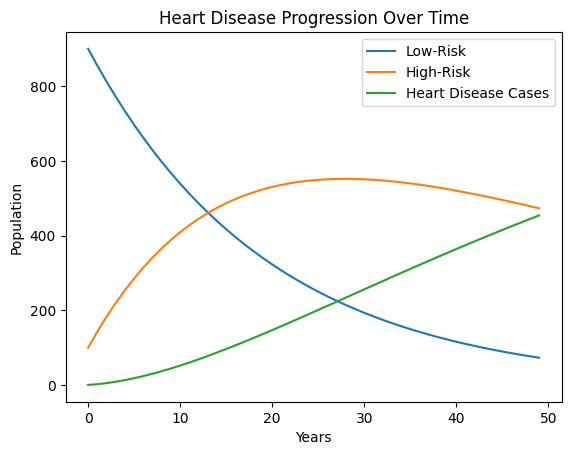

In [ ]:
import matplotlib.pyplot as plt

def heart_disease_model_plot(L=900, H=100, C=0, p_increase=0.05, p_event=0.02, years=50):
    L_values, H_values, C_values = [], [], []

    for year in range(years):
        L_values.append(L)
        H_values.append(H)
        C_values.append(C)

        new_high_risk = p_increase * L
        new_cases = p_event * H

        L = L - new_high_risk
        H = H + new_high_risk - new_cases
        C = C + new_cases

    # Plot
    plt.plot(range(years), L_values, label='Low-Risk')
    plt.plot(range(years), H_values, label='High-Risk')
    plt.plot(range(years), C_values, label='Heart Disease Cases')
    plt.xlabel('Years')
    plt.ylabel('Population')
    plt.legend()
    plt.title('Heart Disease Progression Over Time')
    plt.show()

# Run plot version
heart_disease_model_plot()

In [ ]:
# Heart Disease Risk Progression Model
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def heart_disease_model(N=1000, L0=900, H0=100, C0=0,
                        p_increase=0.05, p_event=0.02, steps=50):
    L, H, C = [L0], [H0], [C0]
    for t in range(1, steps):
        new_high_risk = p_increase * L[-1]
        new_cases = p_event * H[-1]
        L.append(L[-1] - new_high_risk)
        H.append(H[-1] + new_high_risk - new_cases)
        C.append(C[-1] + new_cases)
    t = np.arange(steps)
    plt.figure(figsize=(8,5))
    plt.plot(t, L, label="Low Risk")
    plt.plot(t, H, label="High Risk")
    plt.plot(t, C, label="Heart Events")
    plt.title(f"Heart Disease Risk Simulation\n(p_increase={p_increase}, p_event={p_event})")
    plt.xlabel("Years")
    plt.ylabel("People")
    plt.legend(); plt.grid(True)
    plt.show()

interact(
    N=IntSlider(min=500, max=5000, step=100, value=1000),
    L0=IntSlider(min=100, max=5000, step=100, value=900),
    H0=IntSlider(min=0, max=1000, step=50, value=100),
    p_increase=FloatSlider(min=0.0, max=0.2, step=0.01, value=0.05),
    p_event=FloatSlider(min=0.0, max=0.1, step=0.01, value=0.02),
    steps=IntSlider(min=10, max=100, step=5, value=50)
)(heart_disease_model);

interactive(children=(IntSlider(value=1000, description='N', max=5000, min=500, step=100), IntSlider(value=900…

In [ ]:
# ❤️ Interactive Heart Disease Model
import matplotlib.pyplot as plt
from ipywidgets import interact

def heart_disease_model(age=40, activity=3, diet=3, years=50):
    """
    Simulates heart disease risk progression with lifestyle and age factors.
    age: person's age (years)
    activity: 1-5 scale (1 = sedentary, 5 = very active)
    diet: 1-5 scale (1 = poor diet, 5 = excellent diet)
    """

    # --- Base population ---
    L, H, C = 900, 100, 0

    # --- Adjust probabilities based on lifestyle ---
    # Older age -> higher risk
    age_factor = (age - 30) / 50  # starts increasing around 30

    # Activity & diet reduce risk
    lifestyle_factor = (6 - activity) * 0.02 + (6 - diet) * 0.02

    # Final probabilities
    p_increase = 0.03 + age_factor * 0.02 + lifestyle_factor * 0.5
    p_event = 0.01 + age_factor * 0.015 + lifestyle_factor * 0.25

    # --- Simulate over time ---
    L_values, H_values, C_values = [], [], []

    for year in range(years):
        L_values.append(L)
        H_values.append(H)
        C_values.append(C)

        new_high_risk = p_increase * L
        new_cases = p_event * H

        L = L - new_high_risk
        H = H + new_high_risk - new_cases
        C = C + new_cases

    # --- Plot results ---
    plt.figure(figsize=(8,5))
    plt.plot(range(years), L_values, label='Low-Risk')
    plt.plot(range(years), H_values, label='High-Risk')
    plt.plot(range(years), C_values, label='Heart Disease Cases')
    plt.xlabel('Years')
    plt.ylabel('Population')
    plt.title(f'Heart Disease Progression (Age={age}, Activity={activity}, Diet={diet})')
    plt.legend()
    plt.show()

# 🧠 Interactive sliders
interact(
    heart_disease_model,
    age=(20, 80, 1),
    activity=(1, 5, 1),
    diet=(1, 5, 1),
    years=(10, 100, 5)
);

interactive(children=(IntSlider(value=40, description='age', max=80, min=20), IntSlider(value=3, description='…

In [ ]:
# 🦟 Mosquito-borne Disease Host–Vector Model (Ross–Macdonald style)
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown

def run_vector_model(disease="Dengue", N=1000, M=2000, I_h0=1, I_m0=50, steps=120,
                     a=0.3, b_h=0.4, b_m=0.3, gamma=0.14, mu_m=0.1):
    """
    N = human population
    M = mosquito population (constant for simplicity)
    a = bites per mosquito per time step
    b_h = infection probability mosquito → human per bite
    b_m = infection probability human → mosquito per bite
    gamma = human recovery rate
    mu_m = mosquito death/loss rate
    """
    S_h, I_h, R_h = [N - I_h0], [I_h0], [0]
    S_m, I_m = [M - I_m0], [I_m0]

    for t in range(1, steps):
        lam_h = a * b_h * (I_m[-1] / M)           # force of infection to humans
        new_inf_h = lam_h * S_h[-1]
        new_rec_h = gamma * I_h[-1]

        S_h.append(S_h[-1] - new_inf_h)
        I_h.append(I_h[-1] + new_inf_h - new_rec_h)
        R_h.append(R_h[-1] + new_rec_h)

        lam_m = a * b_m * (I_h[-1] / N)           # force of infection to mosquitoes
        new_inf_m = lam_m * S_m[-1]
        I_m_next = I_m[-1] + new_inf_m - mu_m * I_m[-1]

        S_m.append(max(M - I_m_next, 0))
        I_m.append(max(I_m_next, 0))

    t = np.arange(steps)
    plt.figure(figsize=(9,5))
    plt.plot(t, I_h, label="Infected Humans")
    plt.plot(t, I_m, label="Infected Mosquitoes")
    plt.title(f"{disease} Simulation (Host–Vector Model)")
    plt.xlabel("Time Steps")
    plt.ylabel("Infected Count")
    plt.legend(); plt.grid(True); plt.show()

@interact(
    disease=Dropdown(options=["Dengue","West Nile","EEE"], value="Dengue"),
    N=IntSlider(min=500, max=5000, step=100, value=1000),
    M=IntSlider(min=1000, max=10000, step=500, value=3000),
    I_h0=IntSlider(min=1, max=50, step=1, value=1),
    I_m0=IntSlider(min=0, max=300, step=10, value=50),
    a=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.3),
    b_h=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.4),
    b_m=FloatSlider(min=0.0, max=1.0, step=0.01, value=0.3),
    gamma=FloatSlider(min=0.01, max=0.5, step=0.01, value=0.14),
    mu_m=FloatSlider(min=0.01, max=0.5, step=0.01, value=0.1),
    steps=IntSlider(min=30, max=400, step=10, value=180)
)
def _run(disease, N, M, I_h0, I_m0, a, b_h, b_m, gamma, mu_m, steps):
    run_vector_model(disease, N, M, I_h0, I_m0, steps, a, b_h, b_m, gamma, mu_m)

print("N = Human population")
print("M = Mosquito populaiton")
print("l_h0 = Intial infected humans")
print("l_m0 = Initial infected mosquitos")
print("a = Bite rate pr mosquito per time step")
print("b_h = Transmission probablity -from mosquito to human-")
print("b_m = Transmission probability -from human to mosquito")
print("gamma = Human recovery rate")
print("mu_m = Mosquito death rate")
print("steps = Simulation time steps")

interactive(children=(Dropdown(description='disease', options=('Dengue', 'West Nile', 'EEE'), value='Dengue'),…

N = Human population
M = Mosquito populaiton
l_h0 = Intial infected humans
l_m0 = Initial infected mosquitos
a = Bite rate pr mosquito per time step
b_h = Transmission probablity -from mosquito to human-
b_m = Transmission probability -from human to mosquito
gamma = Human recovery rate
mu_m = Mosquito death rate
steps = Simulation time steps
